image resizing

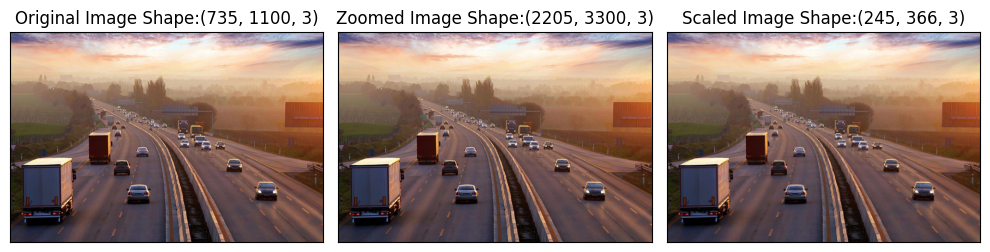

In [8]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the scale factor
# Increase the size by 3 times
scale_factor_1 = 3.0  
# Decrease the size by 3 times
scale_factor_2 = 1/3.0

# Get the original image dimensions
height, width = image_rgb.shape[:2]

# Calculate the new image dimensions
new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)

# Resize the image
zoomed_image = cv2.resize(src =image_rgb, 
                          dsize=(new_width, new_height), 
                          interpolation=cv2.INTER_CUBIC)

# Calculate the new image dimensions
new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)

# Scaled image
scaled_image = cv2.resize(src= image_rgb, 
                          dsize =(new_width1, new_height1), 
                          interpolation=cv2.INTER_AREA)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image Shape:'+str(image_rgb.shape))

# Plot the Zoomed Image
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Shape:'+str(zoomed_image.shape))

# Plot the Scaled Image
axs[2].imshow(scaled_image)
axs[2].set_title('Scaled Image Shape:'+str(scaled_image.shape))

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


image rotate

center : (550, 367)


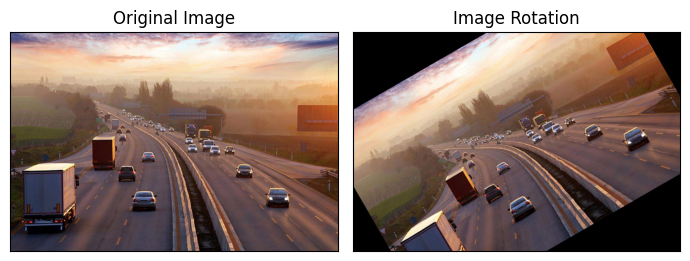

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg')

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

center = (image_rgb.shape[1]//2, image_rgb.shape[0]//2)
print("center :", center)

angle=30
scale=1

rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

fig, axs = plt.subplots(1,2,figsize=(7,4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Rotated image
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


image translation

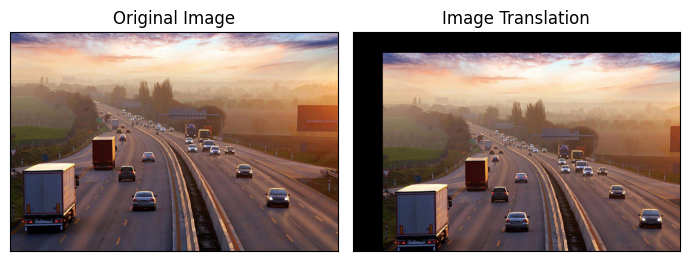

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('image.jpg')

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

width = image_rgb.shape[1]
height = image_rgb.shape[0]

tx = 100
ty = 70

translation_matrix = np.array([[1, 0, tx], [0, 1, ty]],dtype=np.float32)

translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

fig, axs = plt.subplots(1,2,figsize=(7,4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the transalted image
axs[1].imshow(translated_image)
axs[1].set_title('Image Translation')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


Sheared Image

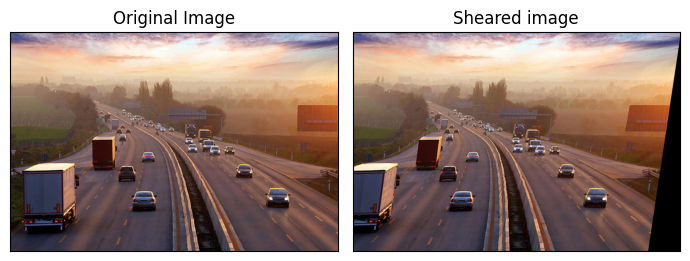

In [7]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image shape along X and Y
width = image_rgb.shape[1]
height = image_rgb.shape[0]

# Define the Shearing factor
shearX = -0.15
shearY = 0

# Define the Transformation matrix for shearing
transformation_matrix = np.array([[1, shearX, 0], 
                                  [0, 1, shearY]], dtype=np.float32)
# Apply shearing
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Sheared image
axs[1].imshow(sheared_image)
axs[1].set_title('Sheared image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


image normalization

[[0.35294118 0.34901961 0.34509804 ... 0.77647059 0.78039216 0.78039216]
 [0.3372549  0.3372549  0.33333333 ... 0.74901961 0.75294118 0.75294118]
 [0.31764706 0.31764706 0.31764706 ... 0.7372549  0.74509804 0.74509804]
 ...
 [0.21960784 0.23529412 0.25490196 ... 0.51372549 0.51764706 0.51764706]
 [0.21960784 0.23529412 0.25098039 ... 0.50980392 0.50980392 0.50980392]
 [0.21176471 0.22352941 0.23921569 ... 0.51372549 0.51372549 0.51372549]]


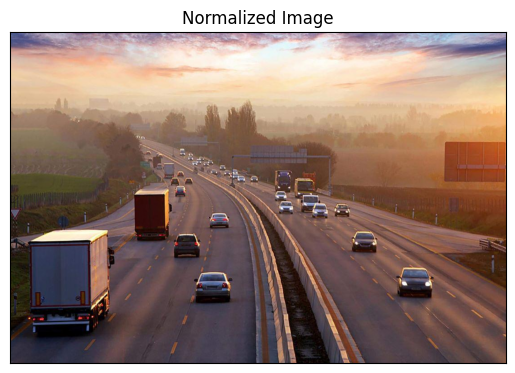

In [8]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into channels
b, g, r = cv2.split(image_rgb)

# Normalization parameter
min_value = 0
max_value = 1
norm_type = cv2.NORM_MINMAX

# Normalize each channel
b_normalized = cv2.normalize(b.astype('float'), None, min_value, max_value, norm_type)
g_normalized = cv2.normalize(g.astype('float'), None, min_value, max_value, norm_type)
r_normalized = cv2.normalize(r.astype('float'), None, min_value, max_value, norm_type)

# Merge the normalized channels back into an image
normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
# Normalized image
print(normalized_image[:,:,0])

plt.imshow(normalized_image)
plt.xticks([])
plt.yticks([])
plt.title('Normalized Image')
plt.show()


edge detection of Image

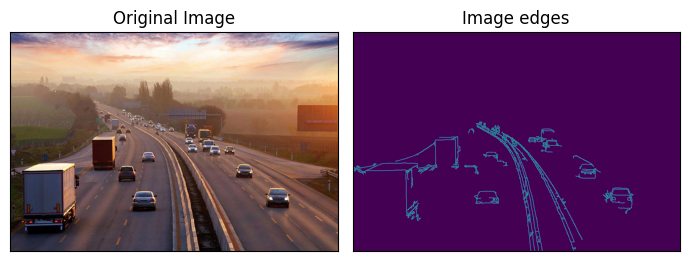

In [13]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Read image from disk.
img = cv2.imread('image.jpg')
# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply Canny edge detection
edges = cv2.Canny(image=image_rgb, threshold1=0, threshold2=1000)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the blurred image
axs[1].imshow(edges)
axs[1].set_title('Image edges')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


Image Bluring

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image.jpg')